##**1. Importing Data**

In [16]:
import numpy as np
import pandas as pd
import matplotlib                 # for plot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

%matplotlib inline

housing = pd.read_csv('housing.csv')
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Check each feature's distribution

column: longitude


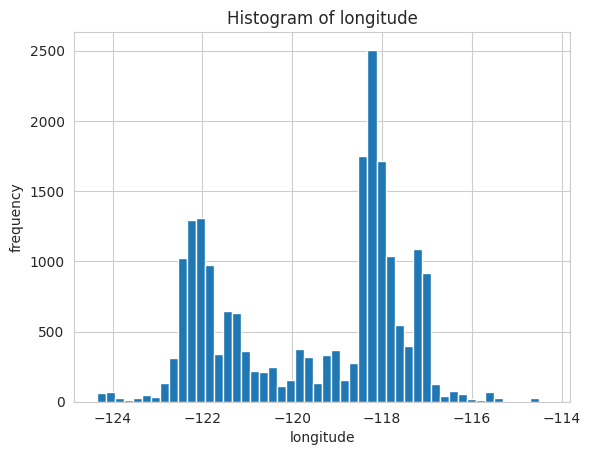

column: latitude


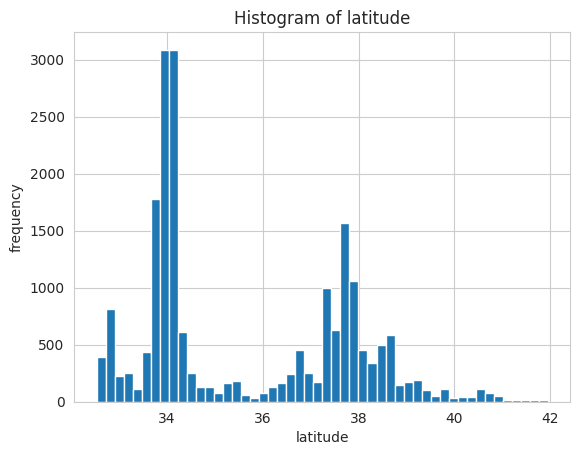

column: housing_median_age


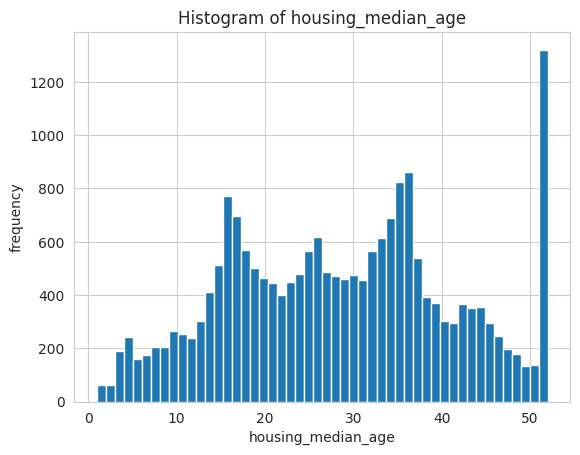

column: total_rooms


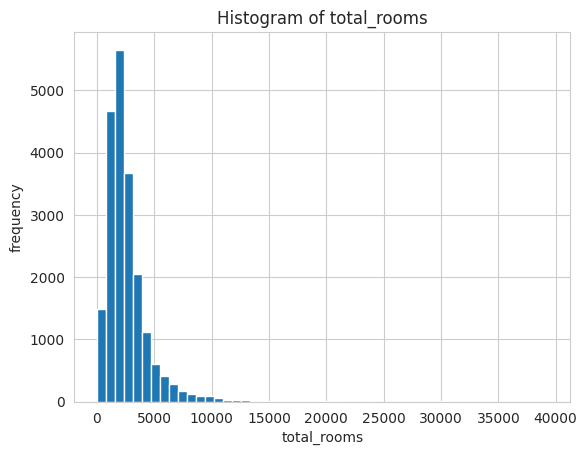

column: total_bedrooms


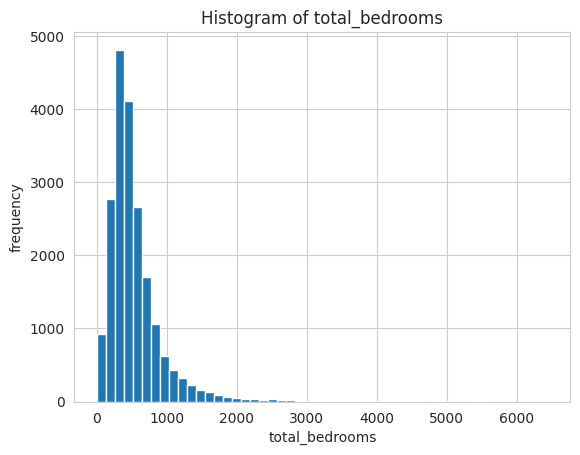

column: population


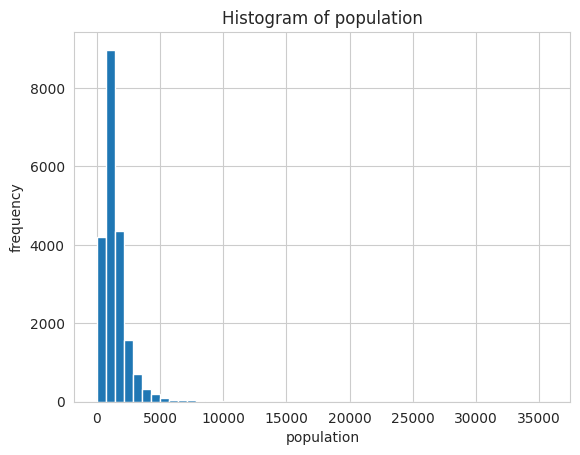

column: median_income


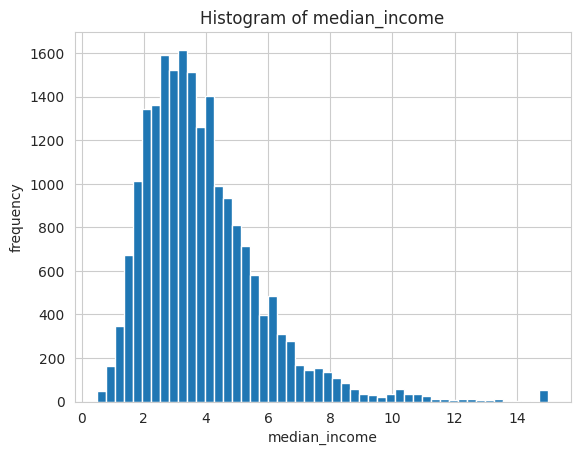

column: median_house_value


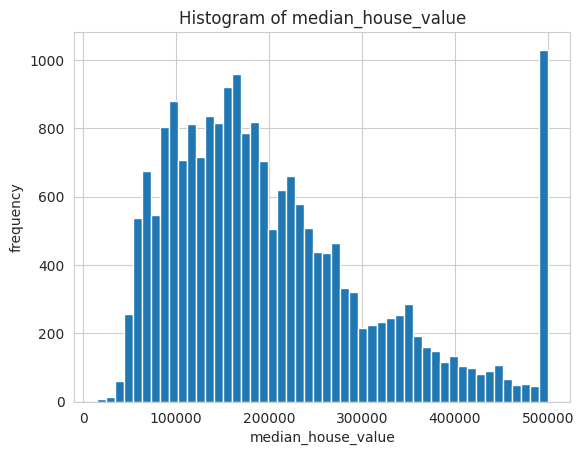

In [17]:
def plot_histogram(df, col):
    bins=50
    col_list = list(housing)
 #   col_list.remove('ocean_proximity')
    print("column: "+col)
    plt.hist(housing[col], bins=bins)
    plt.title("Histogram of "+col)
    plt.xlabel(col)
    plt.ylabel("frequency")
    plt.show()

plot_histogram(housing, "longitude")
plot_histogram(housing, "latitude")
plot_histogram(housing, "housing_median_age")
plot_histogram(housing, "total_rooms")
plot_histogram(housing, "total_bedrooms")
plot_histogram(housing, "population")
plot_histogram(housing, "median_income")
plot_histogram(housing, "median_house_value")

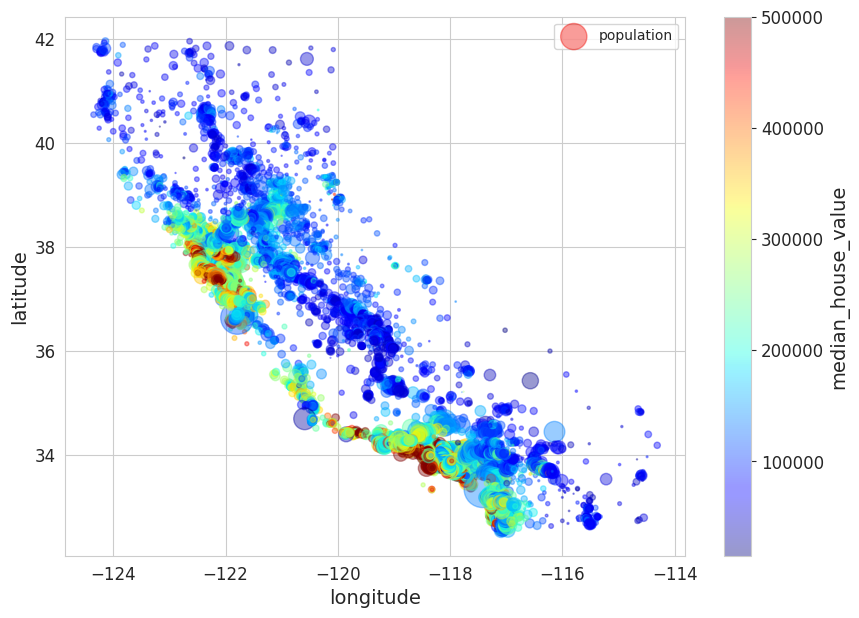

In [18]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/50, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

plt.legend()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

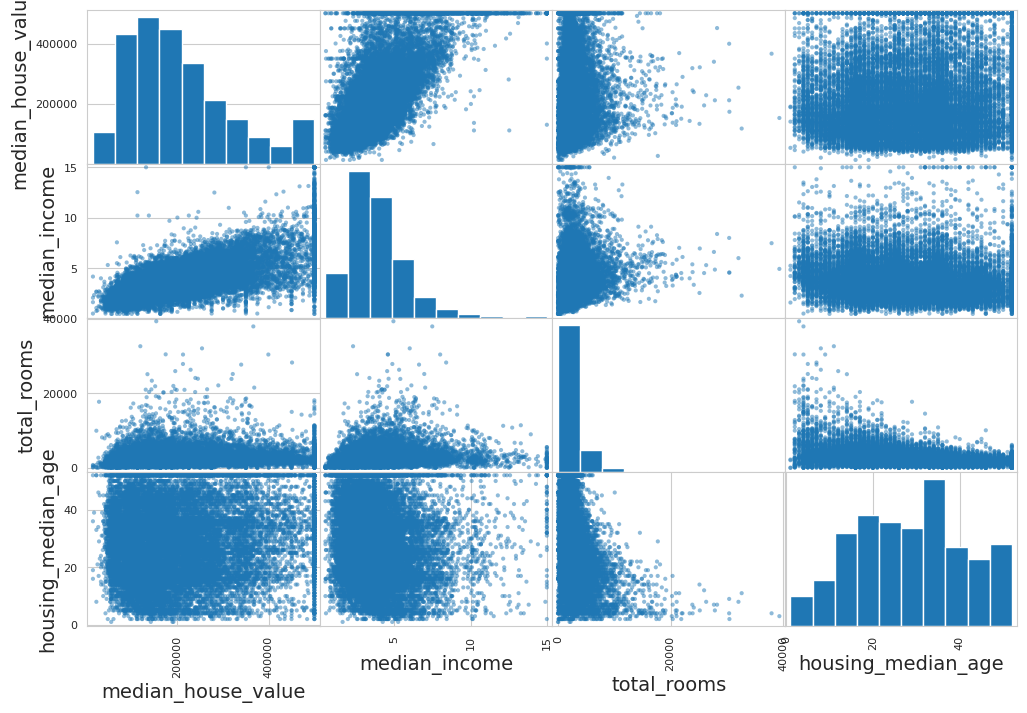

In [19]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

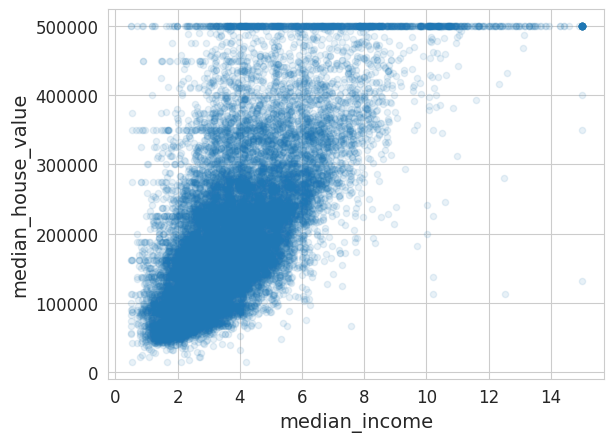

In [20]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [21]:
# check a structure of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
#correlation between the median_house_value and other features
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


<ipython-input-22-3b9a7e3e1f08>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

##**2. Preprocessing step**



####**2-1) Pre-processing**


In [23]:
# Counting NaN values in all columns
nan_count = housing.isna().sum()

print(nan_count)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64



**2-1.1) Data cleaning**

In [24]:
# replace the empty values with the median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**2-1.2) Attributes combinations**

In [25]:
# Attributes combinations
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
del housing["total_rooms"], housing["total_bedrooms"]

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   population           20640 non-null  float64
 4   households           20640 non-null  float64
 5   median_income        20640 non-null  float64
 6   median_house_value   20640 non-null  float64
 7   ocean_proximity      20640 non-null  object 
 8   rooms_per_household  20640 non-null  float64
 9   bedrooms_per_room    20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**2-1.3) Feature Scaling**

**Scikit-Learn** provides a transformer called StandardScaler for standardization.

In [26]:
# feature standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# delete columns of text type and target variable
col_list = list(housing)
col_list.remove('ocean_proximity')  #text type
col_list.remove('median_house_value') #target variable needs not to be scaled

# generate a new dataframe that consist of numeric type only
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)
# Data type conversion from 'Series' to 'DataFrame'
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Concatenate
housing = pd.concat([housing_scaled_df, housing['median_house_value'], housing['ocean_proximity']], axis=1)
housing.head()

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,NEAR BAY
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,NEAR BAY
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,NEAR BAY
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,NEAR BAY
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,NEAR BAY


**2-1.4) Handling Text and Categorical Attributes**

In [27]:
# One-hot encoding
housing = pd.get_dummies(housing)
housing.head(10)

,longitude,latitude,housing_median_age,population,households,median_income,rooms_per_household,bedrooms_per_room,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.974429,-0.977033,2.344766,0.628559,-1.029988,452600.0,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,0.861439,1.669961,2.332238,0.327041,-0.888897,358500.0,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.820777,-0.843637,1.782699,1.155620,-1.291686,352100.0,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.766028,-0.733781,0.932968,0.156966,-0.449613,341300.0,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.759847,-0.629157,-0.012881,0.344711,-0.639087,342200.0,0,0,0,1,0
5,-1.337818,1.038503,1.856182,-0.894071,-0.801787,0.087447,-0.269730,0.275563,269700.0,0,0,0,1,0
6,-1.337818,1.033821,1.856182,-0.292712,0.037823,-0.111366,-0.200918,-0.320242,299200.0,0,0,0,1,0
7,-1.337818,1.033821,1.856182,-0.237079,0.385698,-0.395137,-0.255232,0.115458,241400.0,0,0,0,1,0
8,-1.342809,1.033821,1.061601,-0.193810,0.249687,-0.942359,-0.458703,0.712372,226700.0,0,0,0,1,0
9,-1.337818,1.033821,1.856182,0.110844,0.560944,-0.094470,-0.185283,-0.223507,261100.0,0,0,0,1,0


# Dimensionality Reduction
## 1. PCA

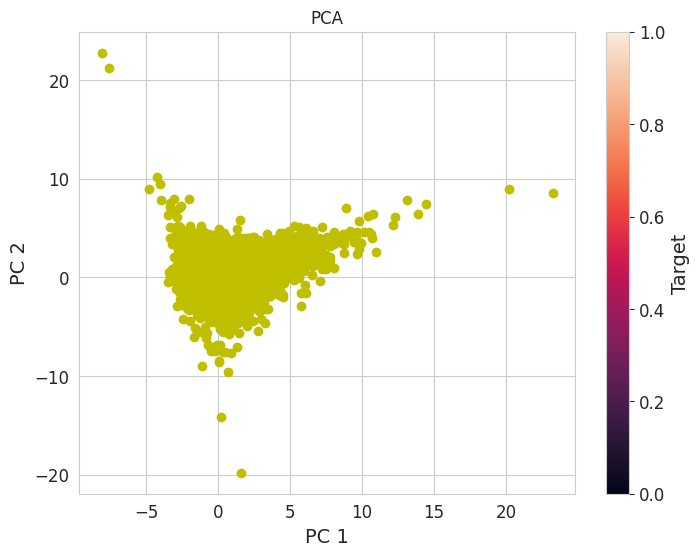

In [38]:
# Linear PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Build a PCA model and reduce the dimensionality into 2. (You can change the number of dimension as you want.)
pca = PCA(n_components=2)
housing_reduced = pca.fit_transform(housing_scaled_df)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(housing_reduced[:, 0], housing_reduced[:, 1], c='y', cmap='viridis')
plt.title('PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()

<ipython-input-34-54db79bbcde6>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis')


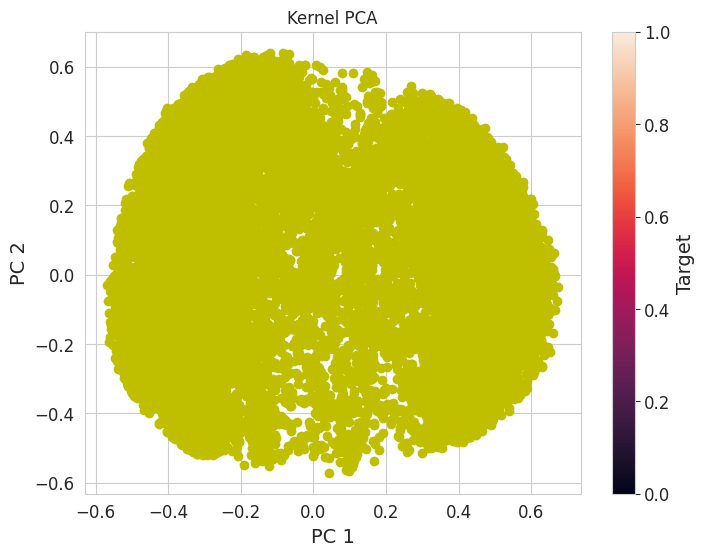

In [34]:
# Kernel PCA
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# Build a Kernel PCA model and reduce the dimensionality into 2.
# I use rbf kernel.
kpca = KernelPCA(kernel='rbf', gamma=0.1, n_components=2)
X_kpca = kpca.fit_transform(housing_scaled_df)

# Visualizing
plt.figure(figsize=(8, 6))
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis')
plt.title('Kernel PCA')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar(label='Target')
plt.show()

# 3. Clustering

## KMeans

In [54]:
df = housing[['longitude', 'latitude', 'median_income']]
df

,longitude,latitude,median_income
0,-1.327835,1.052548,2.344766
1,-1.322844,1.043185,2.332238
2,-1.332827,1.038503,1.782699
3,-1.337818,1.038503,0.932968
4,-1.337818,1.038503,-0.012881
...,...,...,...
20635,-0.758826,1.801647,-1.216128
20636,-0.818722,1.806329,-0.691593
20637,-0.823713,1.778237,-1.142593
20638,-0.873626,1.778237,-1.054583


In [55]:

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_california_housing
kmeans = KMeans(n_clusters=6) # number of clusters must be specified
model = kmeans.fit(df)
model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [56]:
centers = model.cluster_centers_
centers[:5]

array([[-0.08026432,  0.23056741, -0.65817583],
       [ 0.87444904, -0.85025432, -0.57638952],
       [-1.19024473,  0.97381708,  0.85176073],
       [ 0.77138452, -0.82749797,  0.73760116],
       [ 0.20084726, -0.37138466,  3.43407875]])

In [57]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [58]:
P = pd_centers(['longitude', 'latitude', 'median_income'], centers)
P

,longitude,latitude,median_income,prediction
0,-0.080264,0.230567,-0.658176,0
1,0.874449,-0.850254,-0.576390,1
2,-1.190245,0.973817,0.851761,2
3,0.771385,-0.827498,0.737601,3
4,0.200847,-0.371385,3.434079,4
5,-1.161554,1.272813,-0.555645,5


In [59]:
# Create cluster label
data = pd.read_csv('housing.csv')

data['econ_region'] = kmeans.fit_predict(df)
data['econ_region'] = data['econ_region'].astype("category")
data.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,econ_region
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,4


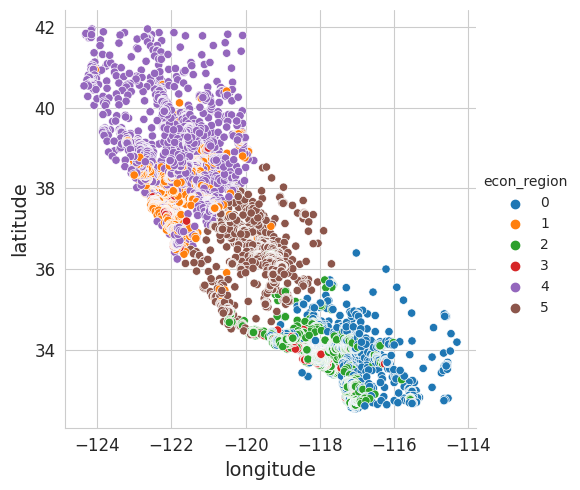

In [60]:
import seaborn as sns

sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='econ_region', data=data, kind='scatter');

In [45]:
median_attributes = ['econ_region', 'median_house_value', 'median_income', 'housing_median_age']
income_house = data[median_attributes]
income_house.groupby(['econ_region']).describe()

median_house_value                                          \
                         count           mean            std       min   
econ_region                                                              
0                       4250.0  270453.827529  102182.365105   14999.0   
1                       2801.0  285601.780079  103452.896128   67500.0   
2                       1657.0  104795.295112   68646.783498   26600.0   
3                       6514.0  172170.320694   81414.408243   14999.0   
4                        579.0  463750.944732   70320.077287  112500.0   
5                       4839.0  156319.412689   86790.819844   14999.0   

                                                    median_income             \
                  25%       50%       75%       max         count       mean   
econ_region                                                                    
0            192625.0  244800.0  331975.0  500001.0        4250.0   5.277339   
1            206700.0  269800.0  351500.0  500001.0        2801.0   5.489327   
2             61500.0   81600.0  117700.0  500001.0        1657.0   2.620062   
3            117100.0  158200.0  201375.0  500001.0        6514.0   2.778743   
4            452950.0  500001.0  500001.0  500001.0         579.0  10.398594   
5             94200.0  134100.0  192550.0  500001.0        4839.0   2.815333   

             ...                     housing_median_age                        \
             ...        75%      max              count       mean        std   
econ_region  ...                                                                
0            ...   5.920125   8.2531             4250.0  26.518118  12.262784   
1            ...   6.100800   9.5551             2801.0  27.163513  13.231255   
2            ...   3.208300   5.0100             1657.0  25.590223  11.137718   
3            ...   3.408600   4.1293             6514.0  30.045134  11.592118   
4            ...  11.187300  15.0001              579.0  27.507772  13.940724   
5            ...   3.479600   4.5590             4839.0  30.644348  13.435782   

                                          
             min   25%   50%   75%   max  
econ_region                               
0            1.0  16.0  27.0  35.0  52.0  
1            1.0  17.0  26.0  36.0  52.0  
2            2.0  17.0  25.0  34.0  52.0  
3            1.0  21.0  31.0  38.0  52.0  
4            2.0  17.0  26.0  37.0  52.0  
5            2.0  19.0  30.0  42.0  52.0  

[6 rows x 24 columns]

##DBSCAN

In [62]:
# Import DBSCAN
from sklearn.cluster import DBSCAN
# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(df[0])

# Visualizing
plt.scatter(df[0][:, 0], df[0][:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()


KeyError: ignored